In [19]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import simple_norm
from astropy.stats import sigma_clipped_stats
from photutils.detection import DAOStarFinder
%matplotlib ipympl

In [3]:
hdu = fits.open('test.fits')

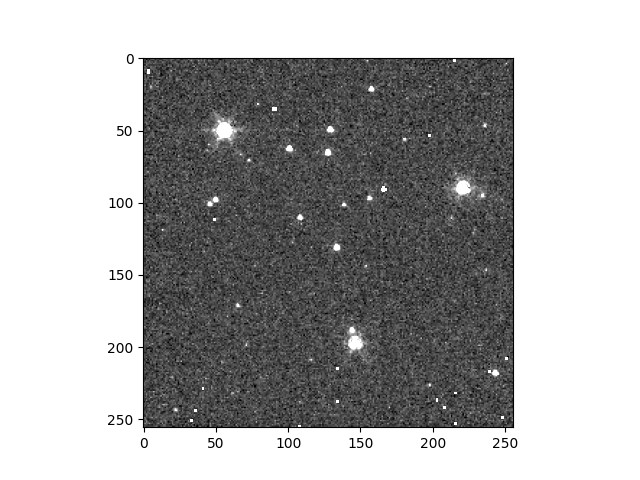

In [17]:
img = hdu[0].data
plt.figure()
plt.imshow(img, cmap='gray', norm = simple_norm(img, 'linear', percent = 99.0))

In [20]:
mean, median, std = sigma_clipped_stats(img, sigma=3.0)  
print(np.array((mean, median, std)))  

[0.17046742 0.17960346 4.8819885 ]


In [34]:
daofind = DAOStarFinder(fwhm=1.0, threshold=5.*std)  
sources = daofind(img - median)  

In [47]:
sources_df = sources.to_pandas().drop(['id'],axis=1)

In [50]:
res = sources_df.loc[sources_df['flux'].idxmax()] # queries brightest star in frame

In [105]:
res

xcentroid        55.235313
ycentroid        50.288518
sharpness         0.941935
roundness1       -0.347873
roundness2       -0.311042
npix             25.000000
sky               0.000000
peak          17760.361328
flux            610.366394
mag              -6.963977
Name: 7, dtype: float64

In [116]:
# Crop 40x40 region around the brightest star in image 
xint, yint = int(res['xcentroid']), int(res['ycentroid'])
img2 = img[yint-20:yint+20,xint-20:xint+20]

In [119]:
# save cropped region as test2.fits
test2_hdu = fits.PrimaryHDU(data=img2)
test2_hdu.writeto('test2.fits')

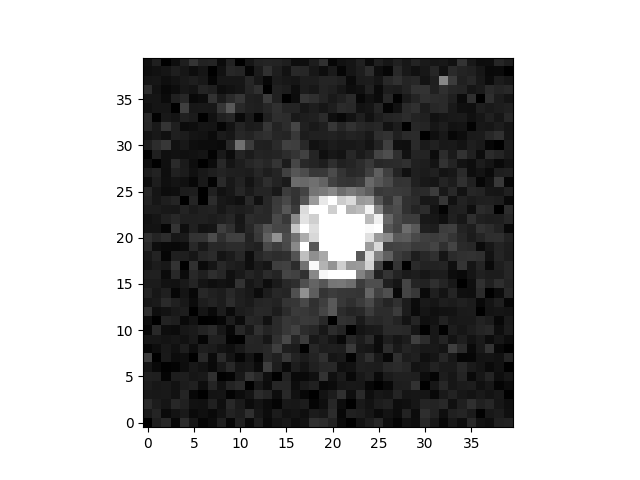

In [117]:
plt.figure()
plt.imshow(img2, cmap='gray', origin='lower', norm=simple_norm(img2, 'linear', percent = 96.0),
           interpolation='nearest')

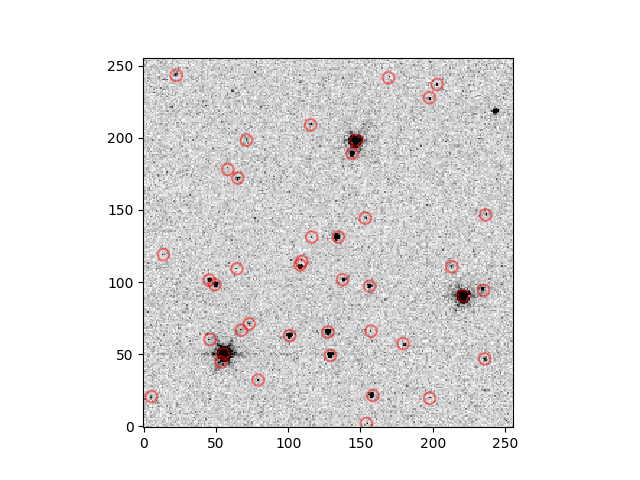

In [36]:
from photutils.aperture import CircularAperture
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(positions, r=4.0)
plt.figure()
plt.imshow(img, cmap='Greys', origin='lower', norm=simple_norm(img, 'linear', percent = 99.0),
           interpolation='nearest')
apertures.plot(color='red', lw=1.5, alpha=0.5);